# TFIM N = 6 hx変えてSA vs Tcut

In [2]:
import qutip as qt
import numpy as np
from pathlib import Path
from datetime import datetime
import matplotlib as mpl
from matplotlib.ticker import MultipleLocator
import matplotlib.patheffects as pe
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from functools import lru_cache

In [11]:
# ========= キャッシュ付きヘルパ =========

@lru_cache(maxsize=None)
def get_ops(N):
    """Nだけで決まる演算子たち"""
    cut_pos = N // 2 - 1
    sx, sz = qt.sigmax(), qt.sigmaz()
    I2 = qt.qeye(2)

    def op_at(i, op):
        return qt.tensor([op if k == i else I2 for k in range(N)])

    Sx = [op_at(i, sx) for i in range(N)]
    Sz = [op_at(i, sz) for i in range(N)]

    def H_exchange(i):
        return Sz[i] * Sz[i+1]

    Hcut_unit   = H_exchange(cut_pos)
    Hex_rest_unit = sum(H_exchange(i) for i in range(N-1) if i != cut_pos)
    Hhx_unit    = sum(Sx[i] for i in range(N))

    left_sites = list(range(N//2))
    return Hcut_unit, Hex_rest_unit, Hhx_unit, left_sites


@lru_cache(maxsize=None)
def get_psi0(N, J, hx):
    """(N, J, hx)で決まる初期基底状態"""
    Hcut_unit, Hex_rest_unit, Hhx_unit, _ = get_ops(N)
    H_full = -J * (Hcut_unit + Hex_rest_unit) - hx * Hhx_unit
    _, psi0 = H_full.groundstate(sparse=True)
    return psi0

# シミュレーション関数
# ========= メイン: Tcut ごとの時間発展 =========

def simulate(N, J, hx, Tcut):
    Hcut_unit, Hex_rest_unit, Hhx_unit, left_sites = get_ops(N)
    psi0 = get_psi0(N, J, hx)

    # H(t) = H_static + (-J * Hcut_unit) * ramp(t)
    H_static = -J * Hex_rest_unit - hx * Hhx_unit

    def ramp(t, T_cut):
        if T_cut == 0.0:
        # # 瞬間クエンチ：t<0で1, t>0で0, t=0は0.5（数値安定のための慣習値）
        #     return 1.0 if t < 0.0 else (0.5 if t == 0.0 else 0.0)
            return 1.0 if t <= 0.0 else 0.0
        if t <= 0.0:
            return 1
        if t >= T_cut:
            return 0.0
        return 1.0 - t / T_cut

    Ht = [H_static, [-J * Hcut_unit, lambda t, args: ramp(t, Tcut)]]

    # 0〜Tcut を分割（最後の点だけ使う）
    nt = 101
    tlist = np.linspace(0.0, Tcut, nt)

    opts = qt.Options(
        method='bdf',      # ← これが効くようにする
        rtol=1e-6,
        atol=1e-8,
        nsteps=200000,
        store_states=False,
        store_final_state=True,
        progress_bar=None,
    )
    
    def EE_op(t, state, args=None):
        rhoL = qt.ptrace(state, left_sites)
        return qt.entropy_vn(rhoL, base=2)
    result = qt.sesolve(Ht, psi0, tlist, e_ops = [EE_op], options=opts)
    return float(result.expect[0][-1])

# グラフ設定
mpl.rcParams.update(mpl.rcParamsDefault)
plt.style.use('default')
mpl.rcParams.update({
    "axes.labelsize": 18,   # 軸ラベル
    "xtick.labelsize": 16,  # 目盛り数字
    "ytick.labelsize": 16,
    "lines.linewidth": 2.2, # 線の太さ
    "axes.titlesize": 16,
})

def inward_ticks(ax, major_len=7, minor_len=4, width=1.2):
    ax.minorticks_on()
    ax.tick_params(which='both', direction='in', top=True, right=True, length=major_len, width=width)
    ax.tick_params(which='minor', length=minor_len, width=width)

markers = ['o', '^', 's', 'D', 'x']

OUTDIR = Path("../../charts/tfim2")

start simulation N = 6, hx = 0.0
Tcut is 0.0
Tcut is 100.0
Tcut is 200.0
Tcut is 300.0
Tcut is 400.0
Tcut is 500.0
Tcut is 600.0
Tcut is 700.0
Tcut is 800.0
Tcut is 900.0
Tcut is 1000.0
Tcut is 1100.0
Tcut is 1200.0
Tcut is 1300.0
Tcut is 1400.0
Tcut is 1500.0
Tcut is 1600.0
Tcut is 1700.0
Tcut is 1800.0
Tcut is 1900.0
Tcut is 2000.0
Tcut is 2100.0
Tcut is 2200.0
Tcut is 2300.0
Tcut is 2400.0
Tcut is 2500.0
Tcut is 2600.0
Tcut is 2700.0
Tcut is 2800.0
Tcut is 2900.0
Tcut is 3000.0
start simulation N = 6, hx = 0.1
Tcut is 0.0
Tcut is 100.0
Tcut is 200.0
Tcut is 300.0
Tcut is 400.0
Tcut is 500.0
Tcut is 600.0
Tcut is 700.0
Tcut is 800.0
Tcut is 900.0
Tcut is 1000.0
Tcut is 1100.0
Tcut is 1200.0
Tcut is 1300.0
Tcut is 1400.0
Tcut is 1500.0
Tcut is 1600.0
Tcut is 1700.0
Tcut is 1800.0
Tcut is 1900.0
Tcut is 2000.0
Tcut is 2100.0
Tcut is 2200.0
Tcut is 2300.0
Tcut is 2400.0
Tcut is 2500.0
Tcut is 2600.0
Tcut is 2700.0
Tcut is 2800.0
Tcut is 2900.0
Tcut is 3000.0
start simulation N = 6, hx =

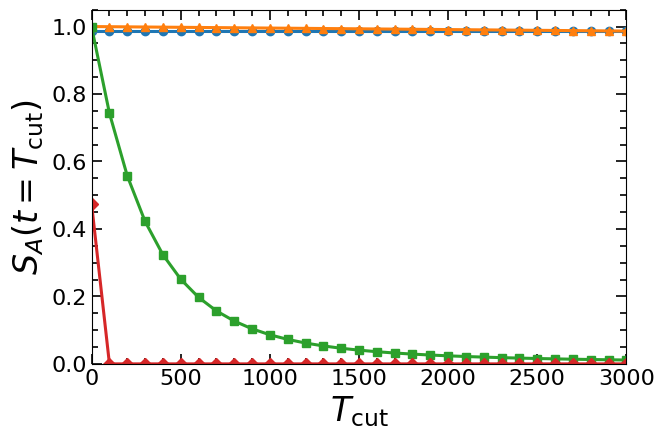

In [15]:
# 入力 : N = 固定 hx_list = リスト 
# グラフ : (SA vs Tcut (len(hx_list)本)) × 1
N = 6
hx_list = [0.0, 0.1, 0.3, 1.0]
Tcut_list = np.linspace(0.0, 3000.0, 31)
J = 1.0
hxstamp = '-'.join(map(str, hx_list))
fig1, ax1 = plt.subplots(figsize=(6.9, 4.6))
max_SA = 0.0
for i, hx in enumerate(hx_list):
    print(f"start simulation N = {N}, hx = {hx}")
    resi_EE = []
    for Tcut in Tcut_list:
        resi_EE.append(simulate(N=N, J=J, hx=hx, Tcut=Tcut))
        print(f"Tcut is {Tcut}")
    resi_EE = np.asarray(resi_EE)
    max_SA = max(max_SA, resi_EE.max())

    mk = markers[i % len(markers)]
    ax1.plot(Tcut_list, resi_EE, marker=mk, markersize=6.0, label=fr"$h_x={hx:g}$", linewidth=2.2)
inward_ticks(ax1)
ax1.set_xlim(Tcut_list.min(), Tcut_list.max())
ax1.set_xlabel(r"$T_{\rm cut}$", fontsize=24)
ax1.set_ylim(0.0, 1.05 * max_SA if max_SA > 0 else 1.0)
ax1.set_ylabel(r"$S_A(t=T_{\rm cut})$", fontsize=24)        
ax1.xaxis.set_major_locator(MultipleLocator(500))
ax1.xaxis.set_minor_locator(MultipleLocator(100))
# ax1.legend(frameon=False)
print("sim 1 done")
plt.show()
fig1.savefig(OUTDIR / f"SA_vs_Tcut_N{N}_hx{hxstamp}.pdf", bbox_inches="tight", dpi=300)

start simulation N = 12, hx = 0.0


/Users/naoki/Desktop/RESEARCH/実験/venv/lib/python3.13/site-packages/qutip/solver/options.py:16: FutureWarning: Dedicated options class are no longer needed, options should be passed as dict to solvers.
  warnings.warn(


Tcut is 0.0
resiEE is 0.966255523099192 when Tcut is 0
Tcut is 1.0
Tcut is 2.0
Tcut is 3.0
Tcut is 4.0
Tcut is 5.0
Tcut is 6.0
Tcut is 7.0
Tcut is 8.0
Tcut is 9.0
Tcut is 10.0
start simulation N = 12, hx = 0.1
Tcut is 0.0
resiEE is 1.0000089427906849 when Tcut is 0
Tcut is 1.0
Tcut is 2.0
Tcut is 3.0
Tcut is 4.0
Tcut is 5.0
Tcut is 6.0
Tcut is 7.0
Tcut is 8.0
Tcut is 9.0
Tcut is 10.0
start simulation N = 12, hx = 0.2
Tcut is 0.0
resiEE is 1.0001215307221207 when Tcut is 0
Tcut is 1.0
Tcut is 2.0
Tcut is 3.0
Tcut is 4.0
Tcut is 5.0
Tcut is 6.0
Tcut is 7.0
Tcut is 8.0
Tcut is 9.0
Tcut is 10.0
start simulation N = 12, hx = 0.30000000000000004
Tcut is 0.0
resiEE is 1.0005632204475285 when Tcut is 0
Tcut is 1.0
Tcut is 2.0
Tcut is 3.0
Tcut is 4.0
Tcut is 5.0
Tcut is 6.0
Tcut is 7.0
Tcut is 8.0
Tcut is 9.0
Tcut is 10.0
start simulation N = 12, hx = 0.4
Tcut is 0.0
resiEE is 1.0016711391639166 when Tcut is 0
Tcut is 1.0
Tcut is 2.0
Tcut is 3.0
Tcut is 4.0
Tcut is 5.0
Tcut is 6.0
Tcut is 7.0
T

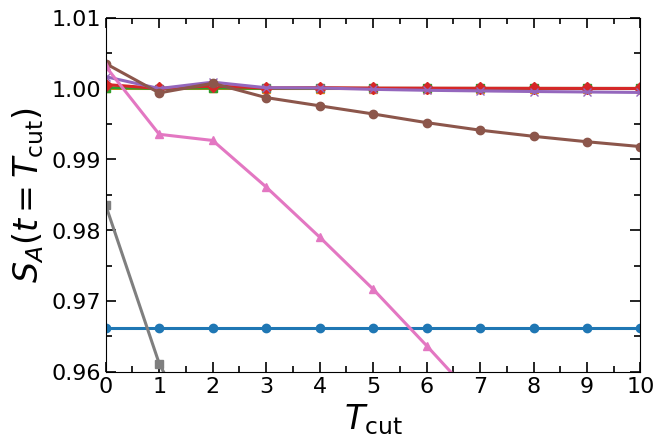

In [34]:
# 入力 : N = 固定 hx_list = リスト 
# グラフ : (SA vs Tcut (len(hx_list)本)) × 1
N = 18
hx_list = np.linspace(0.0, 1.0, 11)
Tcut_list = np.linspace(0.0, 10.0, 11)
J = 1.0
hxstamp = '-'.join(map(str, hx_list))
fig4, ax4 = plt.subplots(figsize=(6.9, 4.6))
max_SA = 0.0
for i, hx in enumerate(hx_list):
    print(f"start simulation N = {N}, hx = {hx}")
    resi_EE = []
    for Tcut in Tcut_list:
        resi_EE.append(simulate(N=N, J=J, hx=hx, Tcut=Tcut))
        print(f"Tcut is {Tcut}")
        if Tcut == 0.0:
            print(f"resiEE is {resi_EE[0]} when Tcut is 0")
    resi_EE = np.asarray(resi_EE)
    max_SA = max(max_SA, resi_EE.max())

    mk = markers[i % len(markers)]
    ax4.plot(Tcut_list, resi_EE, marker=mk, markersize=6.0, label=fr"$h_x={hx:g}$", linewidth=2.2)
inward_ticks(ax4)
ax4.set_xlim(0.0, 10.0)
ax4.set_xlabel(r"$T_{\rm cut}$", fontsize=24)
ax4.set_ylim(0.96, 1.01)
ax4.set_ylabel(r"$S_A(t=T_{\rm cut})$", fontsize=24)    
ax4.yaxis.set_major_locator(MultipleLocator(0.01))
ax4.yaxis.set_minor_locator(MultipleLocator(0.005))
ax4.xaxis.set_major_locator(MultipleLocator(1.0))
ax4.xaxis.set_minor_locator(MultipleLocator(0.5))
# ax4.legend(frameon=False)
print("sim 4 done")
plt.show()
fig4.savefig(OUTDIR / f"SA_vs_Tcut_N{N}_hx{hxstamp}_expand.pdf", bbox_inches="tight", dpi=300)

start simulation N = 4, hx = 1.0
Tcut is 0.0
Tcut is 100.0
Tcut is 200.0


/Users/naoki/Desktop/RESEARCH/実験/venv/lib/python3.13/site-packages/qutip/solver/options.py:16: FutureWarning: Dedicated options class are no longer needed, options should be passed as dict to solvers.
  warnings.warn(


Tcut is 300.0
Tcut is 400.0
Tcut is 500.0
Tcut is 600.0
Tcut is 700.0
Tcut is 800.0
Tcut is 900.0
Tcut is 1000.0
Tcut is 1100.0
Tcut is 1200.0
Tcut is 1300.0
Tcut is 1400.0
Tcut is 1500.0
Tcut is 1600.0
Tcut is 1700.0
Tcut is 1800.0
Tcut is 1900.0
Tcut is 2000.0
Tcut is 2100.0
Tcut is 2200.0
Tcut is 2300.0
Tcut is 2400.0
Tcut is 2500.0
Tcut is 2600.0
Tcut is 2700.0
Tcut is 2800.0
Tcut is 2900.0
Tcut is 3000.0
start simulation N = 6, hx = 1.0
Tcut is 0.0
Tcut is 100.0
Tcut is 200.0
Tcut is 300.0
Tcut is 400.0
Tcut is 500.0
Tcut is 600.0
Tcut is 700.0
Tcut is 800.0
Tcut is 900.0
Tcut is 1000.0
Tcut is 1100.0
Tcut is 1200.0
Tcut is 1300.0
Tcut is 1400.0
Tcut is 1500.0
Tcut is 1600.0
Tcut is 1700.0
Tcut is 1800.0
Tcut is 1900.0
Tcut is 2000.0
Tcut is 2100.0
Tcut is 2200.0
Tcut is 2300.0
Tcut is 2400.0
Tcut is 2500.0
Tcut is 2600.0
Tcut is 2700.0
Tcut is 2800.0
Tcut is 2900.0
Tcut is 3000.0
start simulation N = 8, hx = 1.0
Tcut is 0.0
Tcut is 100.0
Tcut is 200.0
Tcut is 300.0
Tcut is 400.0


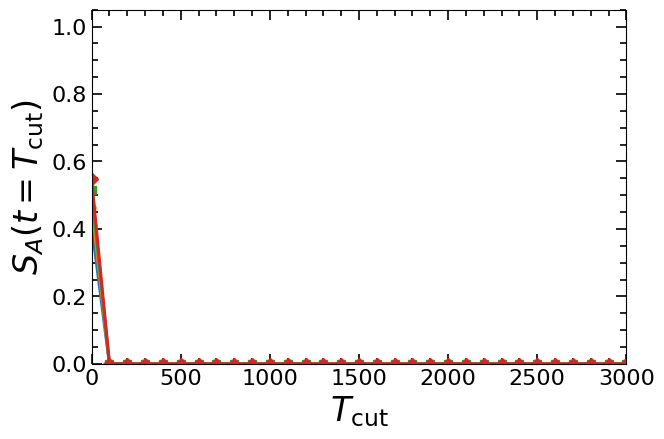

In [20]:
# 想定 : N_list = リスト hx = リスト 
# グラフ : (SA vs Tcut (len(N_list)本)) × len(hx_list)
N_list = [4, 6, 8, 10]
hx_list = [1.0]
Tcut_list = np.linspace(0.0, 3000.0, 31)
nstamp = '-'.join(map(str, N_list))
for i, hx in enumerate(hx_list):
    fig2, ax2 = plt.subplots(figsize=(6.9, 4.6))
    max_SA2 = 0.0
    for j, N in enumerate(N_list):
        print(f"start simulation N = {N}, hx = {hx}")
        resi_EE = []
        for Tcut in Tcut_list:
            resi_EE.append(simulate(N=N, J=J, hx=hx, Tcut=Tcut))
            print(f"Tcut is {Tcut}")
        resi_EE = np.asarray(resi_EE)
        max_SA2 = max(max_SA2, resi_EE.max())
        mk = markers[j % len(markers)]
        ax2.plot(Tcut_list, resi_EE, marker=mk, markersize=6.0, label=fr"$N={N:g}$", linewidth=2.2)
        
    inward_ticks(ax2)
    ax2.set_xlim(Tcut_list.min(), Tcut_list.max())
    ax2.set_xlabel(r"$T_{\rm cut}$", fontsize=24)
    ax2.set_ylim(0.0, 1.05)
    ax2.set_ylabel(r"$S_A(t=T_{\rm cut})$", fontsize=24)        
    ax2.xaxis.set_major_locator(MultipleLocator(500))
    ax2.xaxis.set_minor_locator(MultipleLocator(100))
    # ax2.legend(frameon=False, title=fr"$h_x={hx:g}$") 
    print(f"sim 2-{i} done")
    plt.show()
    fig2.savefig(OUTDIR / f"SA_vs_Tcut_N{nstamp}_hx{hx}.pdf", bbox_inches="tight", dpi=300)

 N is 4
hx is 0.5
 Tcut is 0.0
 Tcut is 10.0
 Tcut is 20.0
 Tcut is 30.0
 Tcut is 40.0
 Tcut is 50.0
 Tcut is 60.0
 Tcut is 70.0
 Tcut is 80.0
 Tcut is 90.0
 Tcut is 100.0
tau is 10.0
sim 3 done


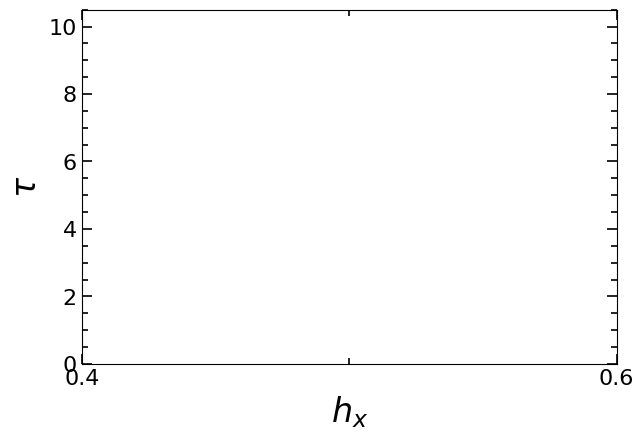

In [22]:
# 想定 : N_list = リスト, hx_list = リスト
# グラフ : (tau_list vs hx_list (len(N_list)本) × 1 
# 本番
# N_list = [4, 6, 8, 10]
# hx_list = np.linspace(0.1, 0.5, 21) 
# テスト
hx_list = [0.5]
N_list = [4]
Tcut_list = np.linspace(0.0, 100.0, 11)

# 0.1
# Tcut_list = np.linspace(0.0, 100000.0, 11)
# 0.2
# Tcut_list = np.linspace(0.0, 10000.0, 11) 
# 0.3
# Tcut_list = np.linspace(0.0, 1000.0, 11) 
# 0.4
# Tcut_list = np.linspace(0.0, 100.0, 11) 
# 0.5
# Tcut_list = np.linspace(0.0, 10.0, 11) 


fig3, ax3 = plt.subplots(figsize=(6.9, 4.6))
tau_max = 0.0
for i, N in enumerate(N_list):
    tau_list = []
    mk = markers[i % len(markers)]
    print(f" N is {N}")
    for j, hx in enumerate(hx_list):
        resi_EE = []
        print(f"hx is {hx}")
        for Tcut in Tcut_list:
            resi_EE.append(simulate(N=N, J=J, hx=hx, Tcut=Tcut))
            print(f" Tcut is {Tcut}")
        resi_EE = np.asarray(resi_EE)

        # SA(t=0)*0.5となる緩和時間を探す
        thr = 0.5 * resi_EE[0]
        relax = resi_EE < thr
        if relax.any():
            k = np.where(relax)[0][0]
            T50 = Tcut_list[k]
            tau_list.append(T50)
            print(f"tau is {T50}")
        else:
            tau_list.append(np.nan)

    if np.isfinite(tau_list).any():
        tau_max = max(tau_max, np.nanmax(tau_list))
    # ax3.plot(hx_list, tau_list, marker=mk, markersize=6.0, label=fr"$N={N:g}$", linewidth=2.2)
inward_ticks(ax3)
ax3.set_xlim(np.asarray(hx_list).min() - 0.1, np.asarray(hx_list).max() + 0.1)
ax3.set_xlabel(r"$h_x$", fontsize=24)
ax3.set_ylim(0.0, 1.05*tau_max if tau_max > 0 else 1.0)
ax3.set_ylabel(r"$\tau$", fontsize=24)        
ax3.xaxis.set_major_locator(MultipleLocator(0.2))
ax3.xaxis.set_minor_locator(MultipleLocator(0.1))
# ax3.legend(frameon=False)
print(f"sim 3 done")
plt.show()
# fig3.savefig(OUTDIR / f"tau_vs_hx_N{nstamp}.pdf", bbox_inches="tight", dpi=300)

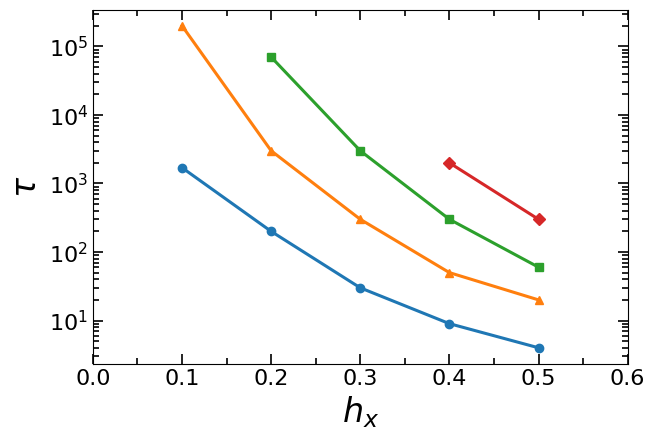

In [23]:
N_list = [4, 6, 8, 10]
hx_list = [0.1, 0.2, 0.3, 0.4, 0.5]
tau_list = [[1700, 200, 30,9,4], [200000, 3000, 300, 50, 20], [np.nan, 70000, 3000, 300, 60], [np.nan, np.nan, np.nan, 2000, 300]]

fig3, ax3 = plt.subplots(figsize=(6.9, 4.6))
for i, N in enumerate(N_list):
    mk = markers[i % len(markers)]
    ax3.plot(hx_list, tau_list[i], marker=mk, markersize=6.0, label=fr"$N={N:g}$", linewidth=2.2)

inward_ticks(ax3)
ax3.set_xlim(np.asarray(hx_list).min() - 0.1, np.asarray(hx_list).max() + 0.1)
ax3.set_xlabel(r"$h_x$", fontsize=24)
ax3.set_xscale('linear')
ax3.set_yscale('log')
ax3.set_ylabel(r"$\tau$", fontsize=24)        
ax3.xaxis.set_major_locator(MultipleLocator(0.1))
ax3.xaxis.set_minor_locator(MultipleLocator(0.05))
plt.show()
nstamp = '-'.join(map(str, N_list))
fig3.savefig(OUTDIR / f"tau_vs_hx_N{nstamp}.pdf", bbox_inches="tight", dpi=300)